In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [37]:
def sample_from_poly(f, t_start = 0, t_end=1, n=0.5):
    t_vals = np.arange(t_start, t_end + n, n)
    ft_pts = [f(t) for t in t_vals]
    return ft_pts
    
def plot_2d_pts(x_pts, y_pts, n = .01, col = 'r', title='', abs_ylim=None):
    plt.plot(x_pts, y_pts, 'ro')
    plt.axvline(x=0, ls='-', c='black', lw=0.5)
    plt.axhline(y=0, ls='-', c='black', lw=0.5)
    plt.title(title)
    if abs_ylim:
        plt.ylim(-5, 5)
    plt.show()

def poly_from_coeffs(coeffs):
    return lambda x: np.dot(np.array([1, x, x**2, x**3]),coeffs)
    
def bezier(endpoints, left_guidepoints, right_guidepoints):
    coeff_lst = []
    assert(left_guidepoints.shape[0] == right_guidepoints.shape[0])
    
    for i in range(left_guidepoints.shape[0]):        
        a_0 = endpoints[i, 0]
        b_0 = endpoints[i, 1]
        
        a_1 = 3*(left_guidepoints[i,0] - endpoints[i,0])
        b_1 = 3*(left_guidepoints[i,1] - endpoints[i,1])
        
        a_2 = 3*(endpoints[i,0] + right_guidepoints[i, 0] -  2*left_guidepoints[i, 0] )
        b_2 = 3*(endpoints[i,1] + right_guidepoints[i, 1] -  2*left_guidepoints[i, 1] )
        
        a_3 = endpoints[i+1, 0] - endpoints[i, 0] + 3*left_guidepoints[i, 0] - 3*right_guidepoints[i, 0]   
        b_3 = endpoints[i+1, 1] - endpoints[i, 1] + 3*left_guidepoints[i, 1] - 3*right_guidepoints[i, 1]
        
        coeff_lst += [[a_0,a_1,a_2,a_3], [b_0,b_1,b_2,b_3]]
    
    return np.matrix(coeff_lst)


In [38]:
endpts = np.matrix([[3,6],[2,2],[6,6],[5,2],[6.5, 3]])
lft_guidepts = np.matrix([[3.3,6.5],[2.8,3.0],[5.8,5.0],[5.5,2.2]])
rt_guidepts = np.matrix([[2.5,2.5],[5.0,5.8],[4.5,2.5],[6.4,2.8]])

curves = bezier(endpts, lft_guidepts, rt_guidepts)


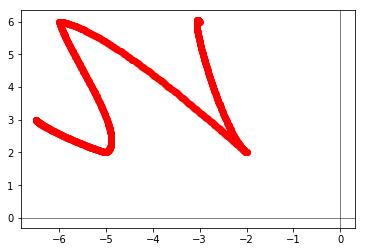

In [47]:
xPts, yPts = np.array([]), np.array([])
for i in np.arange(0,curves.shape[0],2):
    x_samples = sample_from_poly( poly_from_coeffs( np.array(curves[i, :]).flatten() ), n=.005)
    y_samples = sample_from_poly( poly_from_coeffs( np.array(curves[i+1, :]).flatten() ), n=.005)

    xPts = np.append(xPts, x_samples)
    yPts = np.append(yPts, y_samples)

plot_2d_pts(-1*xPts, yPts)